# Avacado Project

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

To download the dataset, use the link given below. 

## Importing the required libraries:

In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,StandardScaler,OrdinalEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [507]:
df = pd.read_csv('avacado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


## EDA (Exploratory Data Analysis)

In [508]:
#lets drop this column, since it is useless
df.drop(['Unnamed: 0'],axis =1,inplace =True)
#Also lets drop date column, since we already have year colum which is usefull
df.drop(['Date'],axis =1,inplace =True)

In [509]:
df.shape

(16468, 12)

We have 16468 rows and 13 columns including target variable in this dataset

In [510]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

'AveragePrice' is target column, Rest are independent columns

In [511]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

We can see all the columns are either float

Date ,type and region column is object and 

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 12 columns):
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(10), object(2)
memory usage: 1.5+ MB


In [513]:
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There are 14951 null values in all columns

Lets drops those null columns

### Handling Null values

In [514]:
df.dropna(inplace =True)

In [515]:
df.shape

(1517, 12)

Now we have 1517 rows and 12 columns now

In [516]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now there are not null values

## Descriptive analysis or summary statistics

In [517]:
#statistical summary
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [518]:
#lets check for correlation among all the columns
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


Lets check correlation with visualization,so that we will get clear picture

In [519]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

All the columns are having high skewness

In [520]:
pd.unique(df['year'])

array([2015., 2016.])

In [521]:
#lets convert year into object datatype
df['year'] = df['year'].astype('object')

## Label Encoding

Lets enocde type and region column since they are object datatype`

In [522]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year             object
region           object
dtype: object

In [523]:
#lets use ordinal encoding 
collist = df.columns
encoding = OrdinalEncoder()

#lets exclude our last column Temp which is created check Train and test
for i in collist:
    if df[i].dtypes == 'object':
        df[i] = encoding.fit_transform(df[i].values.reshape(-1,1))

In [524]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year            float64
region          float64
dtype: object

Now all the columns are either int or float

In [525]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0


In [526]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year            float64
region          float64
dtype: object

Now all the columns are float

In [527]:
pd.unique(df['type'])

array([0.])

In [528]:
#since type column is having only 1 type of attribue, lets drop it
df.drop(['type'],axis =1,inplace = True)

## Data visualization

### Univariate Analysis

In [529]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

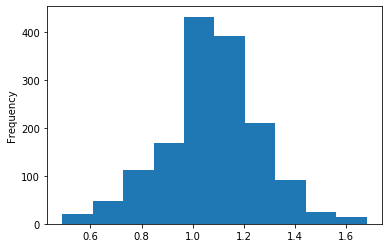

In [530]:
#lets check the distrbution of this column
df['AveragePrice'].plot.hist()
plt.show()

Data is normal distributed for the above column

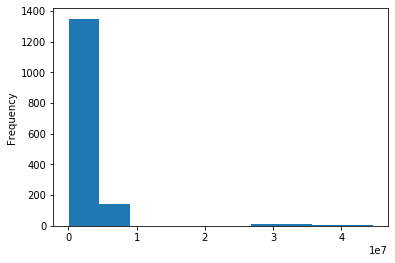

In [531]:

#lets check the distrbution of this column
df['Total Volume'].plot.hist()
plt.show()

Data is Right Skewed for the above column

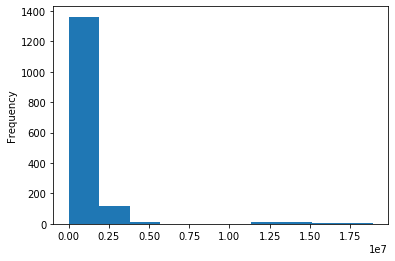

In [532]:
#lets check the distrbution of this column
df['4046'].plot.hist()
plt.show()



Data is Right Skewed for the above column

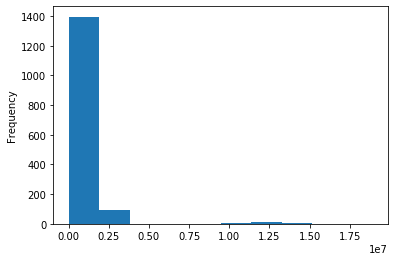

In [533]:
#lets check the distrbution of this column
df['4225'].plot.hist()
plt.show()


Data is Right Skewed for the above column

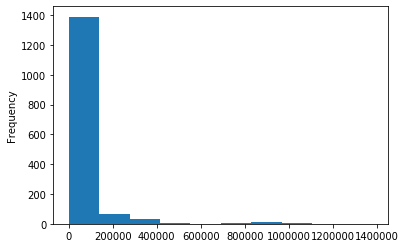

In [534]:
#lets check the distrbution of this column
df['4770'].plot.hist()
plt.show()


Data is Right Skewed for the above column

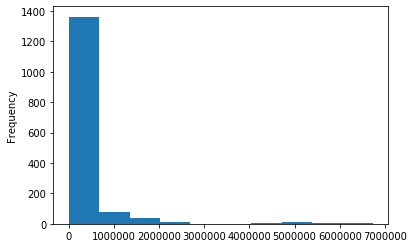

In [535]:
#lets check the distrbution of this column
df['Total Bags'].plot.hist()
plt.show()



Data is Right Skewed for the above column

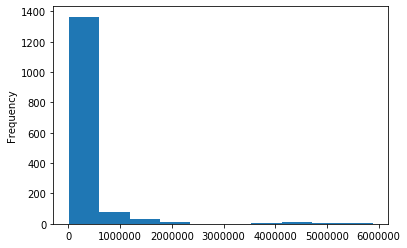

In [536]:
#lets check the distrbution of this column
df['Small Bags'].plot.hist()
plt.show()

Data is Right Skewed for the above column

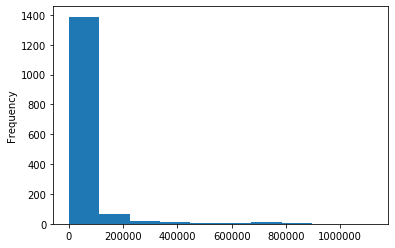

In [537]:

#lets check the distrbution of this column
df['Large Bags'].plot.hist()
plt.show()

Data is Right Skewed for the above column

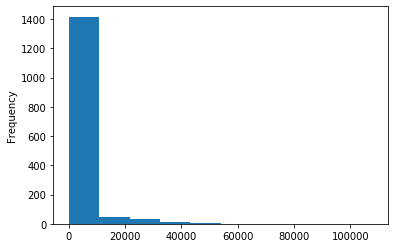

In [538]:
#lets check the distrbution of this column
df['XLarge Bags'].plot.hist()
plt.show()

Data is Right Skewed for the above column

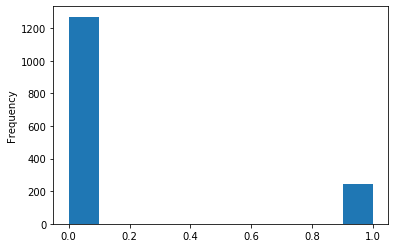

In [539]:
#lets check the distrbution of this column
df['year'].plot.hist()
plt.show()

Data is Right Skewed for the above column

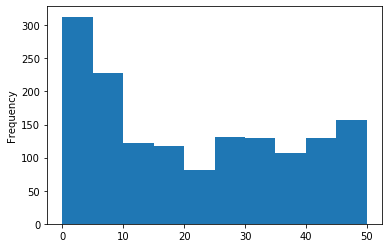

In [540]:

#lets check the distrbution of this column
df['region'].plot.hist()
plt.show()

Data is Right Skewed for the above column

### Bivariate Analysis

In [541]:
#lets make a scatter plot for All the columns againt Target variable

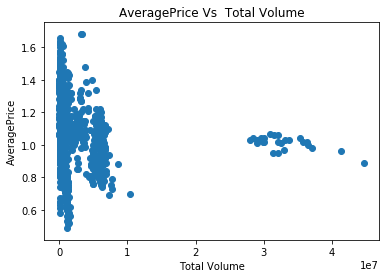

In [542]:

#Lets plot this column against the target variable
plt.scatter(df['Total Volume'],df['AveragePrice'])
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  Total Volume')
plt.show()


We can see very low correlation between this column and target  variable


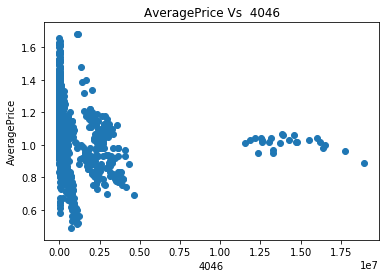

In [543]:
#Lets plot this column against the target variable
plt.scatter(df['4046'],df['AveragePrice'])
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  4046')
plt.show()


We can see very low correlation between this column and target  variable


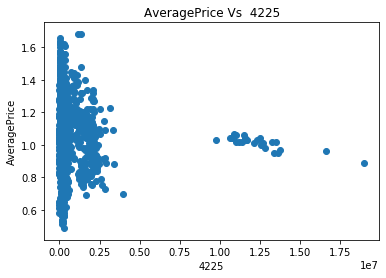

In [544]:
#Lets plot this column against the target variable
plt.scatter(df['4225'],df['AveragePrice'])
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  4225')
plt.show()



We can see very low correlation between this column and target  variable


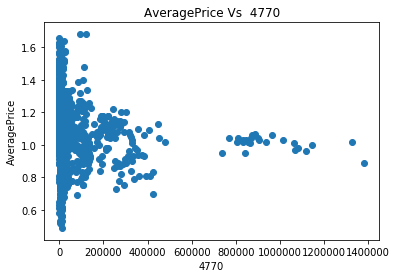

In [545]:
#Lets plot this column against the target variable
plt.scatter(df['4770'],df['AveragePrice'])
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  4770')
plt.show()


We can see very low correlation between this column and target  variable


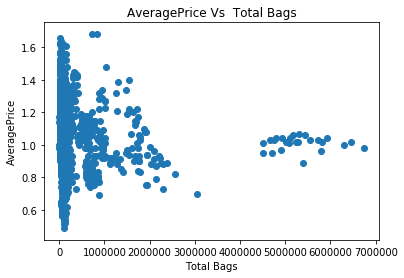

In [546]:


#Lets plot this column against the target variable
plt.scatter(df['Total Bags'],df['AveragePrice'])
plt.xlabel('Total Bags')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  Total Bags')
plt.show()


We can see very low correlation between this column and target  variable


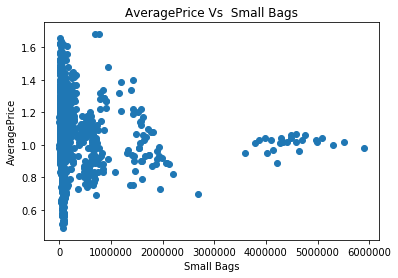

In [547]:


#Lets plot this column against the target variable
plt.scatter(df['Small Bags'],df['AveragePrice'])
plt.xlabel('Small Bags')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  Small Bags')
plt.show()


We can see very low correlation between this column and target  variable


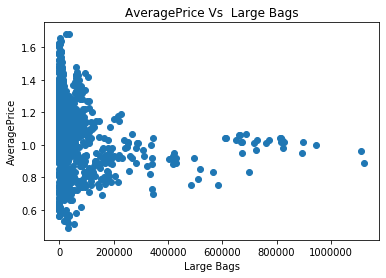

In [548]:



#Lets plot this column against the target variable
plt.scatter(df['Large Bags'],df['AveragePrice'])
plt.xlabel('Large Bags')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  Large Bags')
plt.show()


We can see very low correlation between this column and target  variable


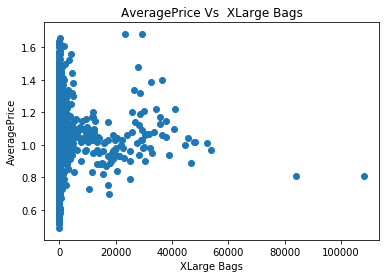

In [549]:

#Lets plot this column against the target variable
plt.scatter(df['XLarge Bags'],df['AveragePrice'])
plt.xlabel('XLarge Bags')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  XLarge Bags')
plt.show()


We can see very low correlation between this column and target  variable


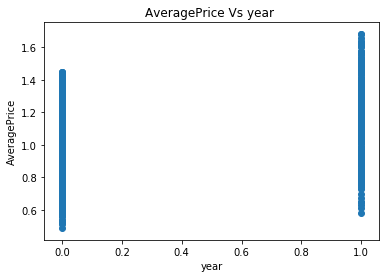

In [550]:

#Lets plot this column against the target variable
plt.scatter(df['year'],df['AveragePrice'])
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs year ')
plt.show()

we can see that the data is equally spreded

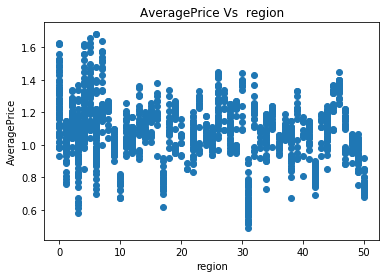

In [551]:

#Lets plot this column against the target variable
plt.scatter(df['region'],df['AveragePrice'])
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.title('AveragePrice Vs  region')
plt.show()


We can see very low correlation between this column and target  variable


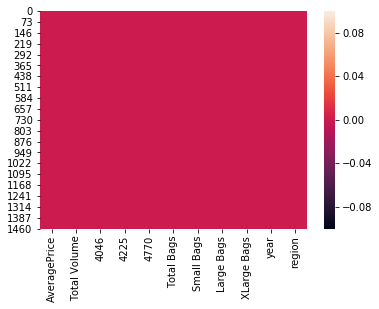

In [552]:
#checking the missing values with visualization technique
sns.heatmap(df.isnull())
plt.show()

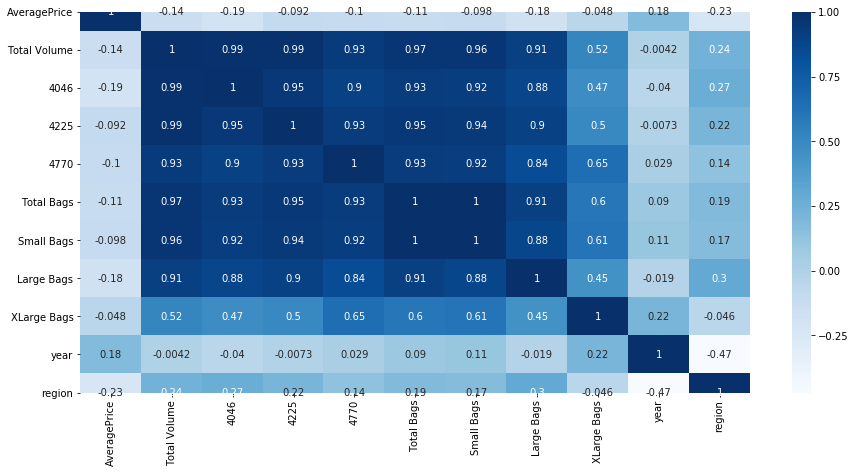

In [553]:
#correlation
fig = plt.figure(figsize=(15,7))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [554]:
#most of the columns are having high correlation with each other
#but no column is having good correlation with target variable
#we can remove some column which are 0.95 correlation wit each other, since they are providing same data

In [555]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
Name: AveragePrice, dtype: float64

all the columns are having very less correlation with target variable

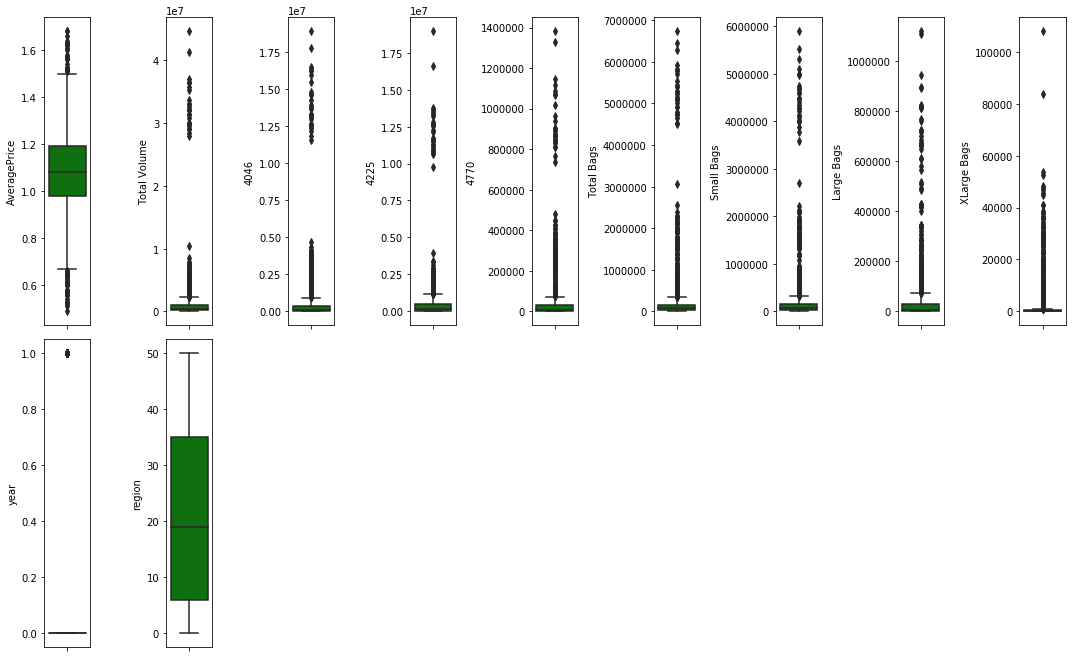

In [556]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

we can see ouliers in all the columns

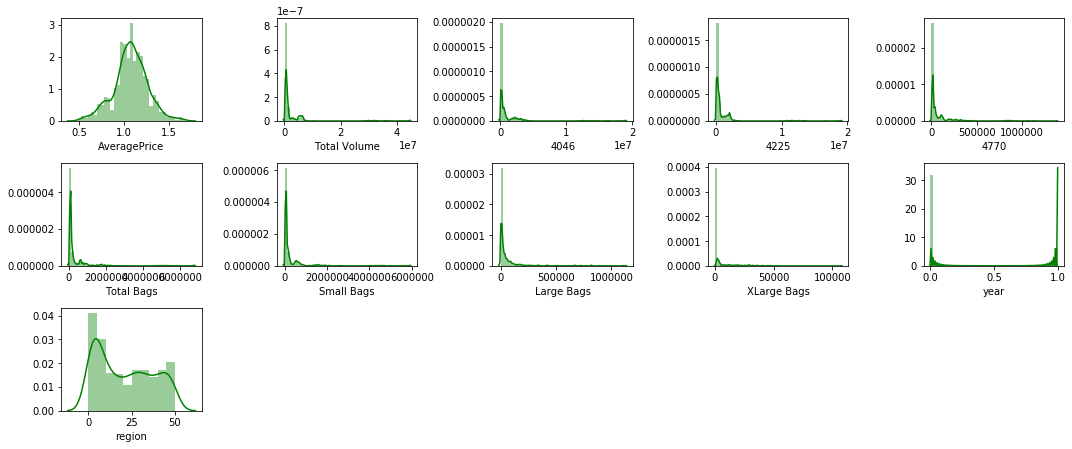

In [557]:
# Lets check the distribution
collist =df.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Almost no column is  normal distributed

## Data Preprocessing

## Outlier Removal

## IQR method

In [558]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [559]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [560]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [561]:
#year and region are coverted using encoding, sp lets remove outliers for only this columns
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags']
for i in numerical_columns:
    outliers_IQR3(df,i) #using this function since all the data was right skewed

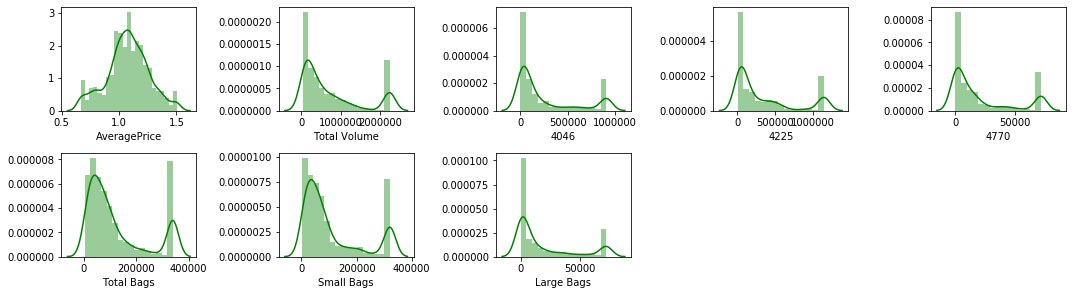

In [562]:
# Lets check the distribution
collist = numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

data is now sthilghy normal distributed

### Zscore method to remove outliers

In [563]:
df.shape

(1517, 11)

In [564]:
#Now lets use Zscore method to remove  outliers
#we can use zscore method, since all the data is almost noraml distrdibuted
z = np.abs(zscore(df))

In [565]:
np.where(z>3)

(array([ 398,  401,  409,  412, 1016, 1017, 1182, 1184, 1187, 1189, 1190,
        1191, 1195, 1198, 1202, 1450, 1451, 1452, 1453, 1454, 1455, 1456,
        1457, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
        1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479,
        1480, 1481, 1483], dtype=int64),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8], dtype=int64))

In [566]:
z = np.abs(zscore(df))
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(1470, 11)

In [567]:
#data loss is very less


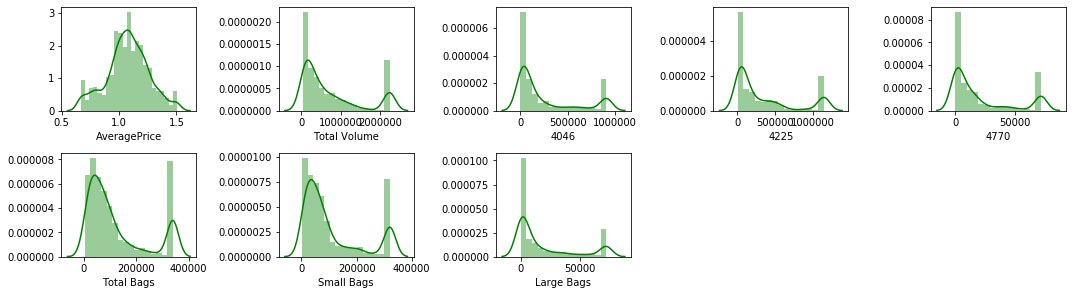

In [568]:
# Lets check the distribution
collist = numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [569]:
#year and region are coverted using encoding, sp lets remove outliers for only this columns
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags']
for i in numerical_columns:
    outliers_normally(df,i) #using this function since all the data was right skewed

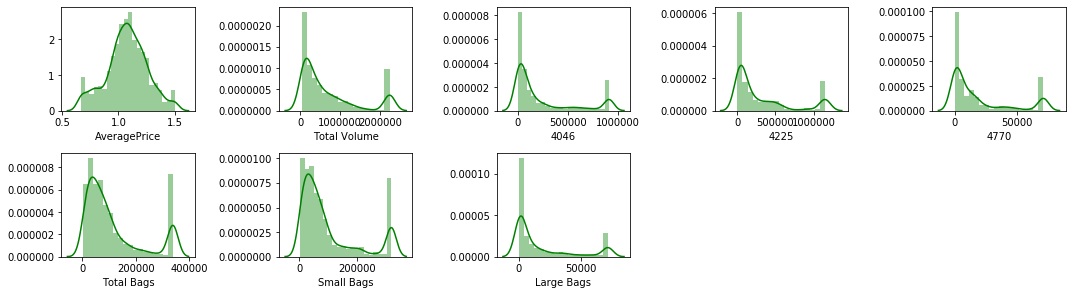

In [570]:
# Lets check the distribution
collist = numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='green')
    plt.tight_layout()

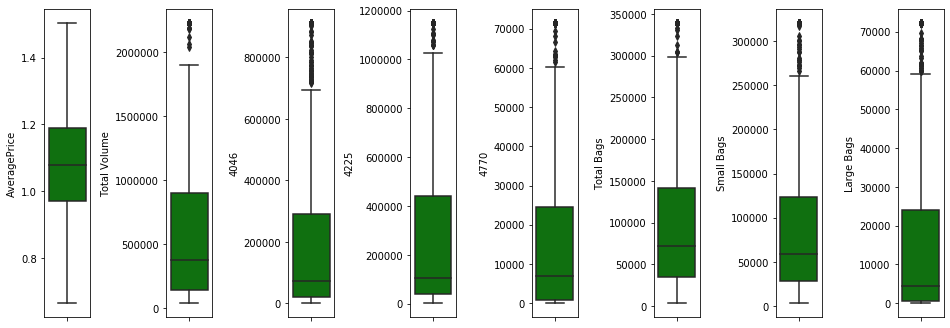

In [571]:
# lets check for outliers among all the columns
collist = numerical_columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

In [572]:
#lets drop x large bags column since correlation with target variable is almost 0.
#and also it has lot of zero values and full of outliers
df_new.drop(['XLarge Bags'],axis =1, inplace = True)

In [573]:
df_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'year', 'region'],
      dtype='object')

## Skewness Reduction

In [574]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df_new['AveragePrice']
X = df_new.drop('AveragePrice',axis = 1)

In [575]:
X.skew()

Total Volume    1.320843
4046            1.360624
4225            1.374597
4770            1.319207
Total Bags      1.240907
Small Bags      1.311045
Large Bags      1.379322
year            2.004176
region          0.258347
dtype: float64

All the colums are having skewness, we can leave year and region column since they are ordinal and nomianl values

In [576]:
X.columns[:-2]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags'],
      dtype='object')

In [577]:
#lest exclude region and year colum

In [578]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = X.columns[:-2]
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

Total Volume    0.007109
4046           -0.099799
4225           -0.023080
4770           -0.146559
Total Bags     -0.020347
Small Bags     -0.009207
Large Bags     -0.203394
year            2.004176
region          0.258347
dtype: float64

now all the columns are in skewness range

### Data scaling

In [579]:
#Lets scale the data using minmax scaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,region
0,0.128480,0.062953,0.483316,0.172551,0.173661,0.195923,0.205160,0.0,0.0
1,0.088567,0.028067,0.452612,0.183941,0.190475,0.214599,0.208018,0.0,0.0
2,0.282066,0.041147,0.593454,0.236166,0.161363,0.181861,0.211672,0.0,0.0
3,0.180723,0.070342,0.526989,0.197411,0.099186,0.109820,0.229010,0.0,0.0
4,0.070158,0.054955,0.449834,0.200131,0.110485,0.120723,0.256597,0.0,0.0


Now all the values are in range of 0 and 1

In [580]:
collist = numerical_columns.remove('AveragePrice')

In [581]:
collist =numerical_columns

In [582]:
collist

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags']

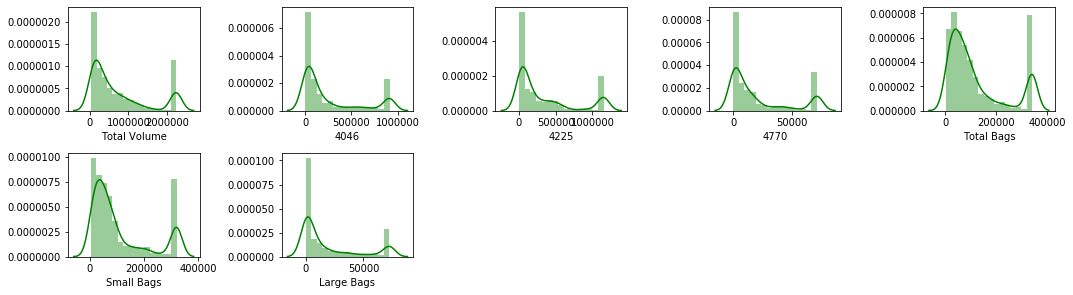

In [583]:
# Lets check the distribution
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

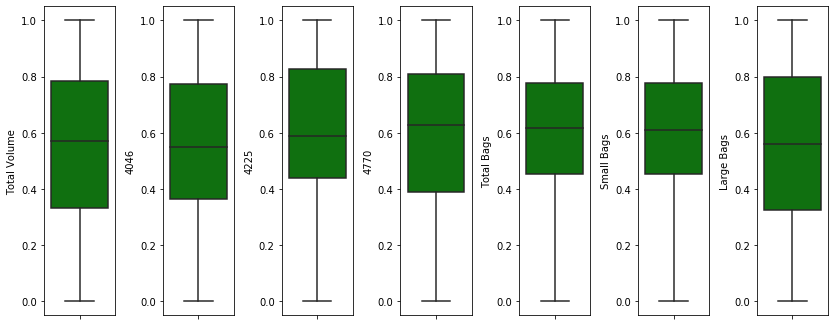

In [584]:
# lets check for outliers among all the columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

Data preproessing has been done completely

Outliers have removed from all the columns and skewness has been reduced and almost all the columns are normal distributed

## Lets Check for Best Random State 

In [585]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

Best r2 score is 0.5042509504781272 on random state 151
Error :
mean absolute error : 0.11250828300824241
mean squared error :  0.018655270495014205
root mean squared error : 0.13658429812761863


In [586]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 151


In [587]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= rand_state )
s =LinearRegression()
s.fit(x_train,y_train)
p = s.predict(x_test)
print(r2_score(y_test,p))

0.5042509504781272


## Model selection :

In [588]:
#lets Choose Among this Five Models
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [589]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X,Y,cv = 5,scoring= 'r2')
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and r2 score is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.5042509504781272
Cross Val score : 0.15131386453968293
Error :
mean absolute error : 0.10432878114761034
mean squared error :  0.018355170423283555
root mean squared error : 0.13548125487787435
Difference :
Diffrence between cross val score and r2 score is : 0.5587924306571188


KNeighborsRegressor()
Scores :
r2 score: 0.8418056198373474
Cross Val score : 0.09977261391303235
Error :
mean absolute error : 0.05775925925925925
mean squared error :  0.005857166666666666
root mean squared error : 0.07653212832965424
Difference :
Diffrence between cross val score and r2 score is : 0.8177270426740136


SVR()
Scores :
r2 score: 0.8026614412469149
Cross Val score : 0.021223000667286752
Error :
mean absolute error : 0.07021908924537056
mean squared error :  0.007306484763796243
root mean squared error : 0.08547797823882033
Difference :
Diffrence between cross val score and r2 score is : 0.8746907458769411


RandomForestRegressor()
Scores :
r2 score: 0.87

In [590]:
#lets check for the least diffrence between cross val score and r2 score
least_difference

[(LinearRegression(), 0.5587924306571188),
 (KNeighborsRegressor(), 0.8177270426740136),
 (SVR(), 0.8746907458769411),
 (RandomForestRegressor(), 0.7899195703720936),
 (AdaBoostRegressor(), 0.6610113693944335)]

In [591]:
#we can choose linear regression as our final model, since we have least diffrence cross val score and r2 score

## Hyperparameter Tuning

In [592]:
# lets create the parameter list to pass in GridsearchCv

parameters = {'fit_intercept': [True,False],'normalize' : [True,False],'copy_X' :[True,False],'n_jobs' : list(range(1,11))}
gsv = GridSearchCV(estimator= lr,param_grid=  parameters,cv =5)
gsv.fit(x_train,y_train)
gsv.best_score_

0.36170504814341903

In [593]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

#we got our best params after hyperparameter tuning

## Regularization

In [594]:
#Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.
from sklearn.linear_model import ElasticNet

In [595]:
parameters = {'alpha' : [.0001,.001,.01,.1,1,10],'random_state' : list(range(1,10))}
eln = ElasticNet()
gsv = GridSearchCV(estimator= eln ,param_grid=  parameters,cv =5)
gsv.fit(x_train,y_train)
gsv.best_score_

0.3612379140151515

In [596]:
gsv.best_params_

{'alpha': 0.0001, 'random_state': 1}

## Creating a Final Model as Linear regression:

In [597]:
final_model = LinearRegression(copy_X= True,fit_intercept= True,n_jobs= 1,normalize=True)
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
#cvs = cross_val_score(m,X,Y,cv =5)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

Score
R2_score : 0.5042509504781272


Error :
mean absolute error : 0.10432878114761036
mean squared error :  0.018355170423283555
root mean squared error : 0.10923994284806385


In [598]:
# we have very less root mean squared error

## Saving the model:

In [599]:
#using joblib for serialization
import joblib
joblib.dump(final_model,'avacado.obj')

['avacado.obj']

In [600]:
avacado_final = joblib.load('avacado.obj')

In [601]:
pred = avacado_final.predict(x_test)
r2_score(y_test,pred)

0.5042509504781272

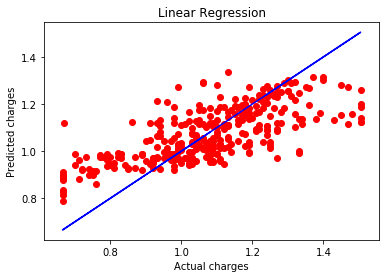

In [602]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = final_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regression')
plt.show()

## conclusion

In [603]:
conclusion = pd.DataFrame((avacado_final.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])

In [604]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
Predicted,1.043982,0.948523,0.882961,1.010194,1.02724,0.945713,0.92336,1.163169,1.045227,0.936681,...,1.142121,1.032618,0.985592,1.197682,1.164703,1.176073,1.105324,1.017617,1.022589,1.105757
Actual,1.080000,1.020000,0.665000,0.990000,1.11000,1.030000,0.85000,1.190000,1.110000,0.980000,...,1.190000,1.080000,0.830000,1.170000,1.280000,1.060000,0.940000,0.930000,1.000000,1.240000


Almost all the values are very close